In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_excel("Flight_Pred_train.xlsx")

In [3]:
#Have a look at the data
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [5]:
#Check the size of the dataset
df.shape

(10683, 11)

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Cleaning and EDA

In [7]:
#Extracting day of journey
df["Day_of_journey"]=pd.to_datetime(df["Date_of_Journey"], format='%d/%m/%Y').dt.day

In [8]:
#Extracting month of journey
df["Month_of_journey"]=pd.to_datetime(df["Date_of_Journey"], format='%d/%m/%Y').dt.month

In [9]:
df.drop(labels='Date_of_Journey', axis='columns', inplace=True)

In [10]:
#Let's check the datafram now
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
#Convert the Dep_time into hour and minutes

df['Dep_hour']=pd.to_datetime(df["Dep_Time"]).dt.hour
df['Dep_min']=pd.to_datetime(df["Dep_Time"]).dt.minute

In [12]:
df.drop(labels='Dep_Time', axis='columns', inplace=True)

In [13]:
#Convert the Arrival_time into hour and minutes

df['Arr_hour']=pd.to_datetime(df["Arrival_Time"]).dt.hour
df['Arr_min']=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [14]:
df.drop(labels='Arrival_Time', axis='columns', inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [16]:
dur_hour=[]
dur_min=[]
for i in df['Duration']:
    if len(i.split()) !=2:
        if 'h' in i:
            dur_hour.append(i)
            dur_min.append(0)
        elif 'm' in i:
            dur_hour.append(0)
            dur_min.append(i)
    elif len(i.split())==2:
            dur_hour.append(i.split()[0])
            dur_min.append(i.split()[1])

df['Dur_hour']=dur_hour
df['Dur_min']=dur_min
        
        

In [17]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19h,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4h,45m


In [18]:
df['Dur_hour']=df['Dur_hour'].astype(str)
df['Dur_hour'] = df['Dur_hour'].map(lambda s: s.replace('h',''))


In [19]:
df['Dur_min']=df['Dur_min'].astype(str)
df['Dur_min'] = df['Dur_min'].map(lambda s: s.replace('m',''))

In [20]:
df['Dur_hour']=df['Dur_hour'].astype(int)
df['Dur_min']=df['Dur_min'].astype(int)

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [22]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_journey       int64
Month_of_journey     int64
Dep_hour             int64
Dep_min              int64
Arr_hour             int64
Arr_min              int64
Dur_hour             int64
Dur_min              int64
dtype: object

In [23]:
#Drop column 'Duration'
df.drop(labels='Duration', axis='columns', inplace=True)

# Handling Categorical Features

We will look at nominal and ordinal categories
Nominal categories--> we can use One hot encoder
Ordinal categories--> we can use Label encoder

In [24]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

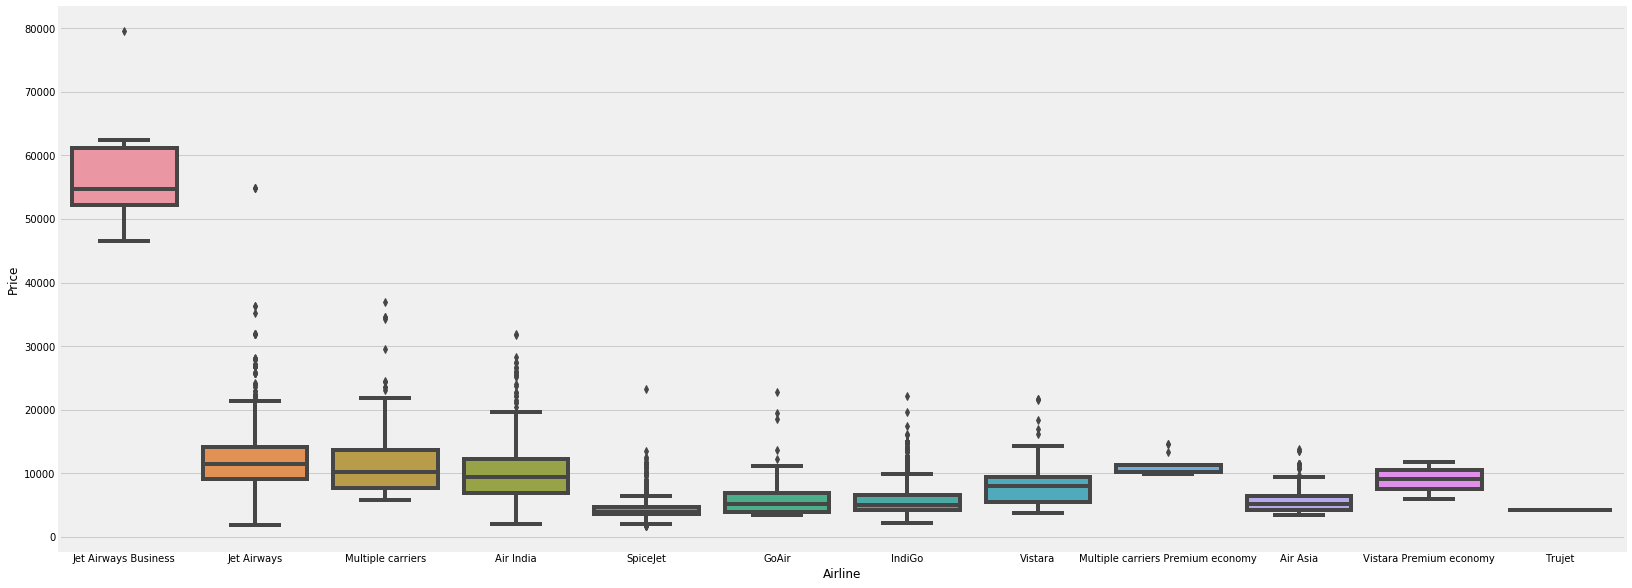

In [26]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False))

In [27]:
#Airline variable is a nominal variable

df=pd.get_dummies(columns=['Airline'], data=df,drop_first=True)


In [28]:
df

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0
5,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,0,0,1,0,0,0
6,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30,0,0,0,1,0,0,0,0,0,0,0
7,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,8,0,5,5,21,5,0,0,0,1,0,0,0,0,0,0,0
8,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30,0,0,0,1,0,0,0,0,0,0,0
9,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50,0,0,0,0,0,1,0,0,0,0,0


In [29]:
#Count of source values
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

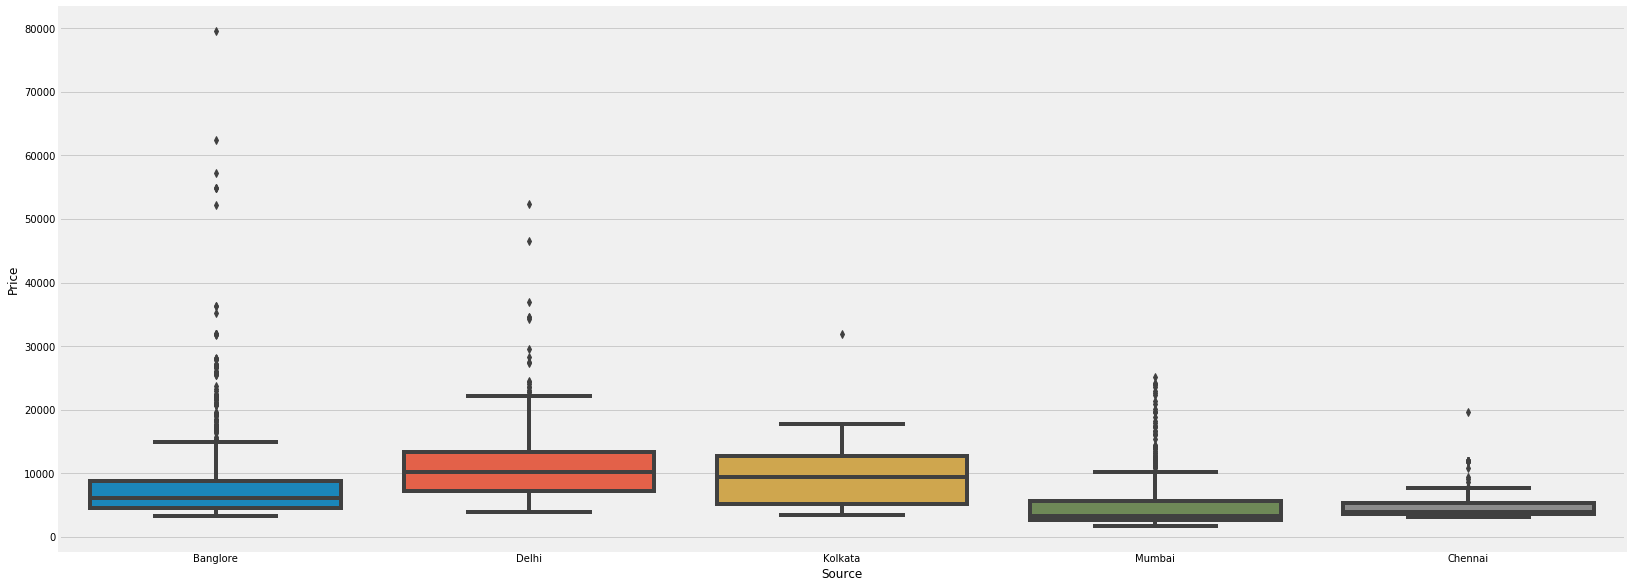

In [30]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Source', y='Price', data=df.sort_values('Price', ascending=False))

In [31]:
#One hot encoding on Source
df=pd.get_dummies(columns=['Source'], data=df,drop_first=True)

In [32]:
df.head()

,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#Count for destination
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
#One hot encoding on Destination
df=pd.get_dummies(columns=['Destination'], data=df,drop_first=True)

In [35]:
#Lets see the Route field
df['Route'].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [36]:
#Additional info has mostly no info under it 
#Route is related to the number of stops so we can drop the Route column
df.drop(['Route', 'Additional_Info'], axis='columns', inplace=True)

In [37]:
df.head()

,Total_Stops,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
#Total stops is an ordinal feature so we will use Label Encoder
#Let's handle the ordinal features: Size, Revenue, Seniority Level
total_stops = {'1 stop': 1, 'non-stop': 0, '2 stops': 2, '3 stops': 3,
            '4 stops': 4}

df['Total_Stops'] = df['Total_Stops'].map(total_stops)

In [39]:
df.head()

,Total_Stops,Price,Day_of_journey,Month_of_journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Dur_hour,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [40]:
df.columns

Index(['Total_Stops', 'Price', 'Day_of_journey', 'Month_of_journey',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Dur_hour', 'Dur_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [41]:
df.dropna(inplace=True)

In [42]:
X=df.drop('Price', axis=1)

In [43]:
y=df['Price']

In [44]:
df_new=df.loc[:,['Total_Stops', 'Price', 'Day_of_journey', 'Month_of_journey',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Dur_hour', 'Dur_min']]

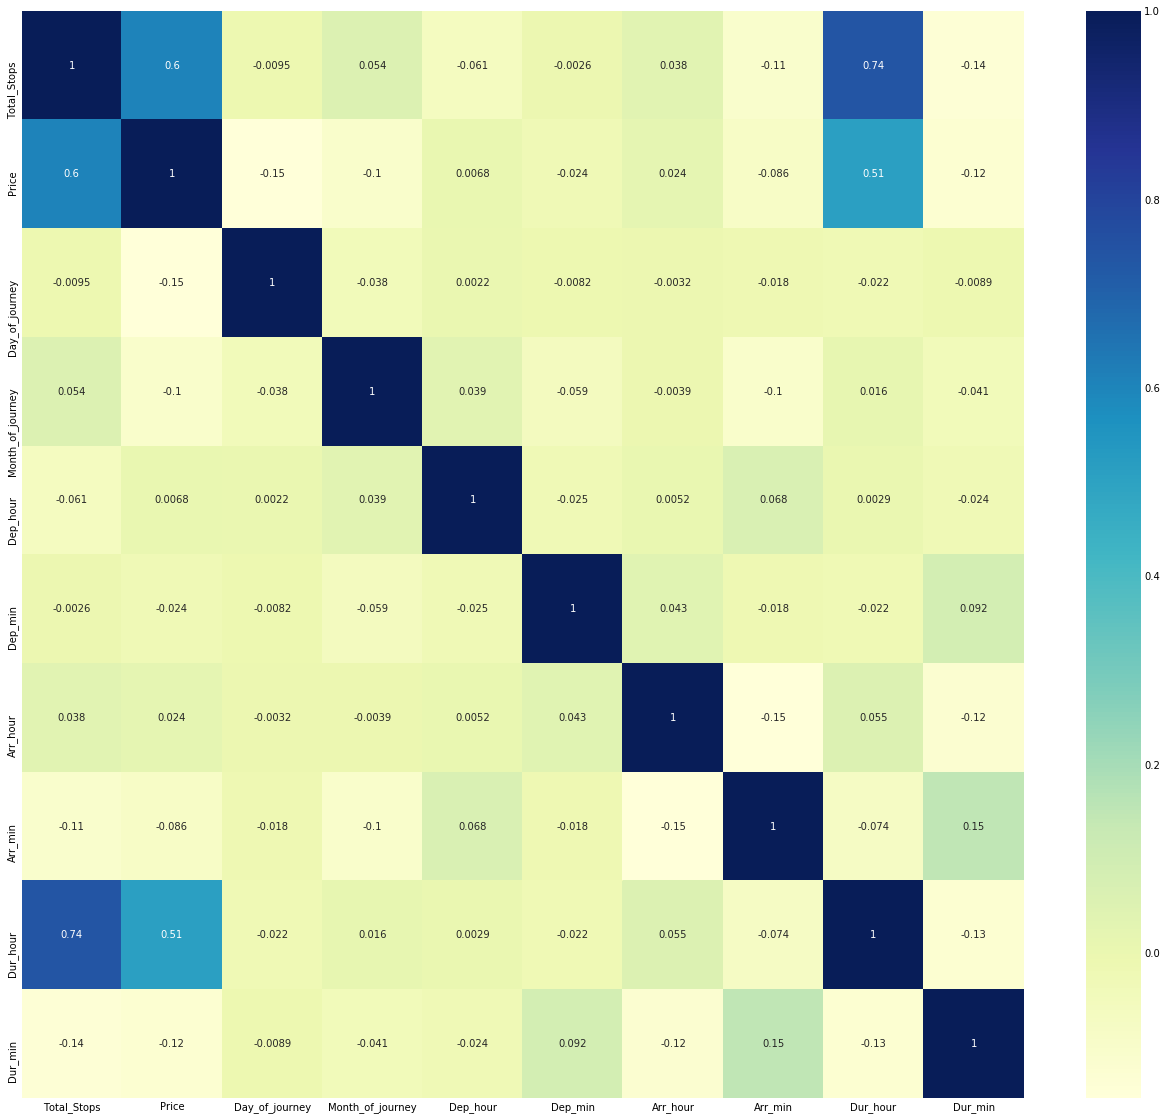

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(), annot=True, cmap="YlGnBu")

In [46]:
df.dropna(inplace=True)

In [47]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [48]:
print(selection.feature_importances_)

[2.54498947e-01 1.43742761e-01 5.23279978e-02 2.50891935e-02
 2.07569674e-02 2.81266003e-02 1.86473632e-02 1.00467445e-01
 1.71141695e-02 1.36619708e-02 1.66483242e-03 2.00381700e-02
 1.25432144e-01 6.62369211e-02 2.01818600e-02 9.39077742e-04
 3.24101476e-03 1.20236205e-04 5.51798359e-03 8.67815855e-05
 4.57563287e-04 9.22920297e-03 3.12362668e-03 8.51914868e-03
 9.42842639e-03 1.62642478e-02 8.04713150e-03 4.56127753e-04
 2.65820884e-02]


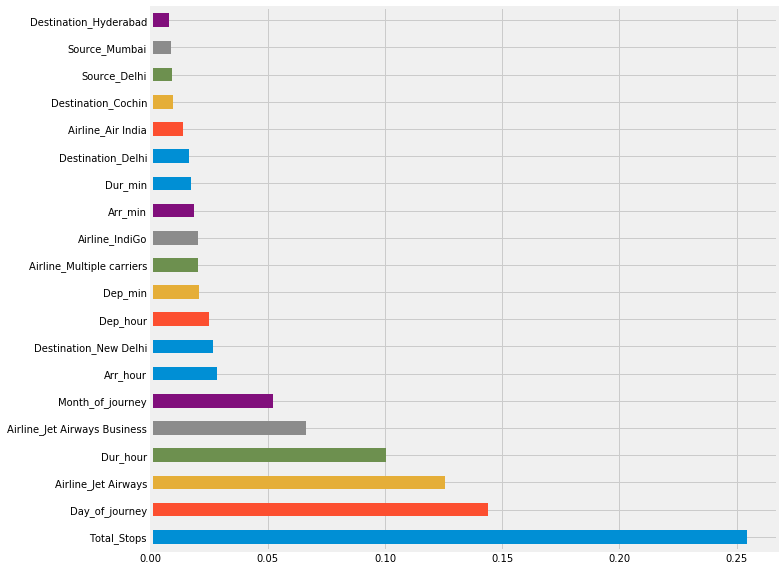

In [49]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (10,10))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}



In [53]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [54]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [55]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [56]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [57]:
prediction = rf_random.predict(X_test)

/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


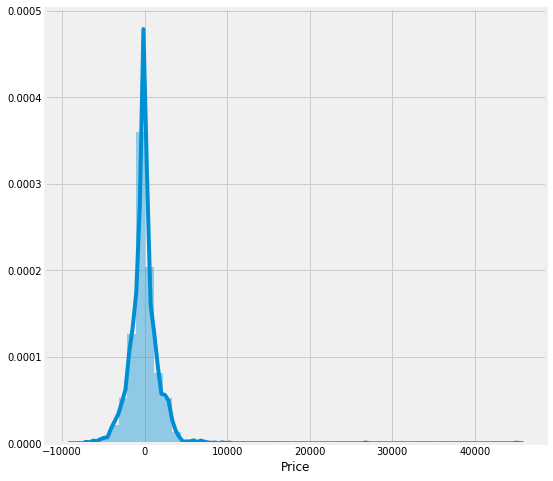

In [58]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

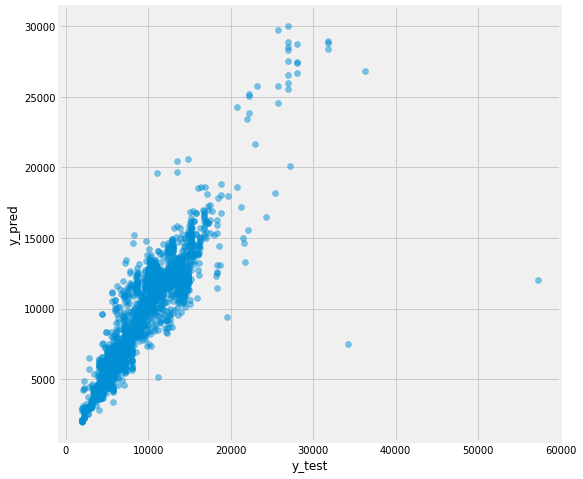

In [59]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1163.6559335616994
MSE: 4053206.9719372466
RMSE: 2013.2578006646954


In [64]:
metrics.r2_score(y_test, prediction)

0.8120213160098582